# PCA

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
arrests = pd.read_csv("USArrests.csv")

df = arrests.copy()

df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
df.index

RangeIndex(start=0, stop=50, step=1)

In [4]:
df.index = df.iloc[:, 0]

df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,,
Alabama,Alabama,13.2,236,58,21.2
Alaska,Alaska,10.0,263,48,44.5
Arizona,Arizona,8.1,294,80,31.0
Arkansas,Arkansas,8.8,190,50,19.5
California,California,9.0,276,91,40.6


In [5]:
df = df.iloc[:, 1:5]

df.head()

,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [6]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [7]:
df.info

<bound method DataFrame.info of                 Murder  Assault  UrbanPop  Rape
Unnamed: 0                                     
Alabama           13.2      236        58  21.2
Alaska            10.0      263        48  44.5
Arizona            8.1      294        80  31.0
Arkansas           8.8      190        50  19.5
California         9.0      276        91  40.6
Colorado           7.9      204        78  38.7
Connecticut        3.3      110        77  11.1
Delaware           5.9      238        72  15.8
Florida           15.4      335        80  31.9
Georgia           17.4      211        60  25.8
Hawaii             5.3       46        83  20.2
Idaho              2.6      120        54  14.2
Illinois          10.4      249        83  24.0
Indiana            7.2      113        65  21.0
Iowa               2.2       56        57  11.3
Kansas             6.0      115        66  18.0
Kentucky           9.7      109        52  16.3
Louisiana         15.4      249        66  22.2
Maine   

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


In [9]:
df.index.name = "States"

df.head()

,Murder,Assault,UrbanPop,Rape
States,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [19]:
df = StandardScaler().fit_transform(df)

In [20]:
df[0:5, 0:5]

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393]])

In [21]:
pca = PCA(n_components = 2)

pca.fit_transform(df)

array([[ 0.98556588,  1.13339238],
       [ 1.95013775,  1.07321326],
       [ 1.76316354, -0.74595678],
       [-0.14142029,  1.11979678],
       [ 2.52398013, -1.54293399],
       [ 1.51456286, -0.98755509],
       [-1.35864746, -1.08892789],
       [ 0.04770931, -0.32535892],
       [ 3.01304227,  0.03922851],
       [ 1.63928304,  1.2789424 ],
       [-0.91265715, -1.57046001],
       [-1.63979985,  0.21097292],
       [ 1.37891072, -0.68184119],
       [-0.50546136, -0.15156254],
       [-2.25364607, -0.10405407],
       [-0.79688112, -0.2701647 ],
       [-0.75085907,  0.95844029],
       [ 1.56481798,  0.87105466],
       [-2.39682949,  0.37639158],
       [ 1.76336939,  0.42765519],
       [-0.48616629, -1.4744965 ],
       [ 2.10844115, -0.15539682],
       [-1.69268181, -0.63226125],
       [ 0.99649446,  2.39379599],
       [ 0.69678733, -0.26335479],
       [-1.18545191,  0.53687437],
       [-1.26563654, -0.19395373],
       [ 2.87439454, -0.7756002 ],
       [-2.38391541,

In [22]:
pca_fit = pca.fit_transform(df)

In [23]:
bilesen_df = pd.DataFrame(data = pca_fit, columns = ["birinci_bilesen", "ikinci_bilesen"])

In [24]:
bilesen_df.head()

,birinci_bilesen,ikinci_bilesen
0,0.985566,1.133392
1,1.950138,1.073213
2,1.763164,-0.745957
3,-0.141420,1.119797
4,2.523980,-1.542934


In [26]:
pca.explained_variance_ratio_

array([0.62006039, 0.24744129])

In [27]:
pca = PCA(n_components = 3)

pca.fit_transform(df)

pca_fit = pca.fit_transform(df)

bilesen_df = pd.DataFrame(data = pca_fit, columns = ["birinci_bilesen", "ikinci_bilesen", "ucuncu_bilesen"])

bilesen_df.head()

,birinci_bilesen,ikinci_bilesen,ucuncu_bilesen
0,0.985566,1.133392,-0.444269
1,1.950138,1.073213,2.040003
2,1.763164,-0.745957,0.054781
3,-0.141420,1.119797,0.114574
4,2.523980,-1.542934,0.598557


In [39]:
pca = PCA(n_components = 4)

pca.fit_transform(df)

pca_fit = pca.fit_transform(df)

bilesen_df = pd.DataFrame(data = pca_fit, columns = ["birinci_bilesen", "ikinci_bilesen", "ucuncu_bilesen", "dorduncu_bilesen"])

bilesen_df.head()

,birinci_bilesen,ikinci_bilesen,ucuncu_bilesen,dorduncu_bilesen
0,0.985566,1.133392,-0.444269,0.156267
1,1.950138,1.073213,2.040003,-0.438583
2,1.763164,-0.745957,0.054781,-0.834653
3,-0.141420,1.119797,0.114574,-0.182811
4,2.523980,-1.542934,0.598557,-0.341996


In [40]:
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

In [41]:
pca = PCA().fit(df)

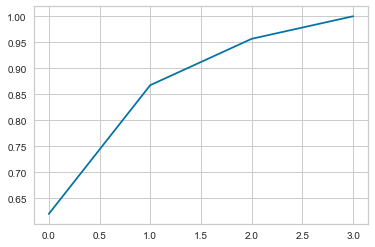

In [42]:
# grafiğe baktığımızda;
# verimizin %95'lik kısmını '3 bileşen' ile açıklıyabiliriz.
# 3 bileşen bizim için yeterli.
# 2. bileşen -> 0.95
# 0. bileşen, 1.bileşen, 2.bileşen

plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [43]:
pca = PCA(n_components = 3)

pca.fit_transform(df)

pca_fit = pca.fit_transform(df)

bilesen_df = pd.DataFrame(data = pca_fit, columns = ["birinci_bilesen", "ikinci_bilesen", "ucuncu_bilesen"])

bilesen_df.head()

,birinci_bilesen,ikinci_bilesen,ucuncu_bilesen
0,0.985566,1.133392,-0.444269
1,1.950138,1.073213,2.040003
2,1.763164,-0.745957,0.054781
3,-0.141420,1.119797,0.114574
4,2.523980,-1.542934,0.598557


In [44]:
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 ])

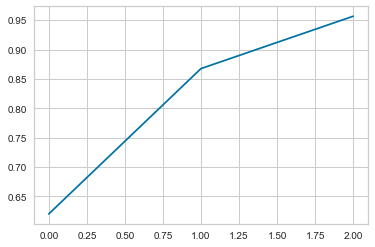

In [46]:
# dolayısı ile bu grafiklere göre
# kaç bileşene göre sınıflandırabileceğimizi kararlaştırabiliriz.

plt.plot(np.cumsum(pca.explained_variance_ratio_))

----------------